# 아파트 월간 매매수급동향과 매매가격지수
- 2019년 1월 ~ 2021년 11월
- 매매수급동향과 가격지수를 비교하여 사겠다는 사람들이 많아지면 가격지수가 어떻게 변하는지 분석하였습니다

출처 = https://www.reb.or.kr/r-one/main.do

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pandas import DataFrame 
import seaborn as sns

In [ ]:
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
rawData = pd.read_csv('/content/sample_data/월간_매매수급동향_아파트.csv')
rawData

,Unnamed: 0,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,강북지역,도심권,동북권,서북권,강남지역,서남권,동남권,경기,경부1권,경부2권,서해안권,동부1권,동부2권,경의권,경원권,인천,부산,중부산권,동부산권,서부산권,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
0,2012년 07월,80.516399,69.543147,89.135310,76.771047,81.191223,85.509709,94.375517,68.413856,72.980251,52.525253,77.906977,75.877193,63.703704,68.078176,57.939914,72.914219,70.358306,69.197708,70.568182,69.578313,87.878788,74.678112,89.007092,56.798867,62.253289,51.481481,51.176471,90.773810,102.631579,91.956522,79.953917,91.161616,-,93.357934,97.302158,88.989637,86.200717,102.091255,103.289474,90.322581,100.769231
1,2012년 08월,82.889044,71.922589,91.502617,81.468172,85.642633,86.832524,95.368073,70.601641,73.249551,57.070707,79.941860,67.105263,67.870370,74.267101,59.442060,74.706228,74.429967,72.779370,72.954545,81.626506,76.515152,77.253219,72.340426,62.606232,69.736842,67.777778,56.176471,86.607143,102.046784,96.956522,88.709677,89.646465,-,96.494465,97.661870,94.948187,94.444444,104.372624,97.894737,87.903226,93.076923
2,2012년 09월,84.054431,71.795685,93.683030,84.394251,89.341693,87.645631,96.546733,69.963537,74.685817,59.595960,81.831395,66.228070,65.092593,70.032573,58.583691,75.000000,76.710098,71.203438,78.522727,67.168675,81.818182,70.386266,83.333333,62.039660,72.039474,65.740741,71.470588,82.738095,104.678363,99.130435,98.617512,94.444444,-,99.077491,98.201439,98.704663,85.663082,101.330799,100.921053,94.959677,80.000000
3,2012년 10월,84.626657,71.430838,94.991278,85.549281,91.097179,88.361650,97.559967,68.960802,70.825853,55.050505,76.598837,67.105263,67.037037,66.612378,67.596567,75.293772,80.781759,68.624642,76.590909,76.807229,78.030303,75.965665,71.631206,60.481586,75.164474,70.185185,73.529412,84.821429,104.239766,100.000000,100.460830,96.717172,-,98.708487,99.100719,97.538860,87.634409,101.711027,100.921053,97.883065,90.000000
4,2012년 11월,86.092114,73.826142,95.726389,85.497947,90.721003,89.927184,99.028122,72.743847,78.994614,62.626263,87.063953,68.859649,66.296296,71.498371,59.442060,76.997650,83.713355,73.925501,77.272727,72.590361,78.787879,74.248927,78.014184,61.898017,72.697368,65.185185,74.117647,83.333333,105.701754,99.565217,101.382489,98.232323,-,100.922509,98.561151,100.259067,88.888889,99.619772,105.657895,98.588710,91.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2021년 07월,121.741429,128.656115,115.491732,118.491903,116.382515,123.105403,115.711916,124.951942,125.901254,115.944272,132.634731,111.538462,124.037736,121.795728,126.953125,131.221210,138.531514,126.761304,140.557591,120.484791,109.266409,122.992182,135.187761,126.406926,120.931980,118.971963,121.672772,122.862694,102.556350,114.921260,132.854578,112.700107,88.09523809523809,116.380952,122.097054,131.550069,116.087676,109.371782,111.484848,108.596838,113.555556
109,2021년 08월,123.881429,130.861820,117.572346,120.541498,118.157928,125.214483,118.073583,127.479815,129.075235,120.278638,134.550898,117.799642,125.943396,124.899866,127.300347,133.053026,141.325536,130.310200,140.903541,123.146388,113.706564,127.149964,128.789986,129.485329,122.585494,118.411215,125.824176,124.935233,104.260583,119.055118,132.001795,114.887940,88.69047619047619,118.714286,125.736568,133.333333,118.279570,112.358393,112.848485,111.106719,117.111111
110,2021년 09월,122.930000,128.538758,117.860640,119.731781,116.760672,124.369319,119.391041,125.278739,124.529781,123.993808,126.197605,119.856887,126.000000,125.000000,127.300347,129.833958,117.186485,126.708728,136.060236,123.479087,129.922780,142.181947,128.998609,130.880231,121.645998,117.383178,125.457875,123.510363,98.543156,120.708661,129.892280,117.289221,96.7261904761905,122.857143,120.320624,133.436214,126.344086,116.477858,112.424242,112.094862,115.777778
111,2021년 10월,113.145714,115.334617,111.167319,111.528340,110.274324,114.625677,112.369474,111.803153,108.699060,112.383901,109.311377,104.740608,114.792

In [ ]:
rawData.rename(columns={'Unnamed: 0':'날짜'}, inplace=True)
rawData

,날짜,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,강북지역,도심권,동북권,서북권,강남지역,서남권,동남권,경기,경부1권,경부2권,서해안권,동부1권,동부2권,경의권,경원권,인천,부산,중부산권,동부산권,서부산권,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
0,2012년 07월,80.516399,69.543147,89.135310,76.771047,81.191223,85.509709,94.375517,68.413856,72.980251,52.525253,77.906977,75.877193,63.703704,68.078176,57.939914,72.914219,70.358306,69.197708,70.568182,69.578313,87.878788,74.678112,89.007092,56.798867,62.253289,51.481481,51.176471,90.773810,102.631579,91.956522,79.953917,91.161616,-,93.357934,97.302158,88.989637,86.200717,102.091255,103.289474,90.322581,100.769231
1,2012년 08월,82.889044,71.922589,91.502617,81.468172,85.642633,86.832524,95.368073,70.601641,73.249551,57.070707,79.941860,67.105263,67.870370,74.267101,59.442060,74.706228,74.429967,72.779370,72.954545,81.626506,76.515152,77.253219,72.340426,62.606232,69.736842,67.777778,56.176471,86.607143,102.046784,96.956522,88.709677,89.646465,-,96.494465,97.661870,94.948187,94.444444,104.372624,97.894737,87.903226,93.076923
2,2012년 09월,84.054431,71.795685,93.683030,84.394251,89.341693,87.645631,96.546733,69.963537,74.685817,59.595960,81.831395,66.228070,65.092593,70.032573,58.583691,75.000000,76.710098,71.203438,78.522727,67.168675,81.818182,70.386266,83.333333,62.039660,72.039474,65.740741,71.470588,82.738095,104.678363,99.130435,98.617512,94.444444,-,99.077491,98.201439,98.704663,85.663082,101.330799,100.921053,94.959677,80.000000
3,2012년 10월,84.626657,71.430838,94.991278,85.549281,91.097179,88.361650,97.559967,68.960802,70.825853,55.050505,76.598837,67.105263,67.037037,66.612378,67.596567,75.293772,80.781759,68.624642,76.590909,76.807229,78.030303,75.965665,71.631206,60.481586,75.164474,70.185185,73.529412,84.821429,104.239766,100.000000,100.460830,96.717172,-,98.708487,99.100719,97.538860,87.634409,101.711027,100.921053,97.883065,90.000000
4,2012년 11월,86.092114,73.826142,95.726389,85.497947,90.721003,89.927184,99.028122,72.743847,78.994614,62.626263,87.063953,68.859649,66.296296,71.498371,59.442060,76.997650,83.713355,73.925501,77.272727,72.590361,78.787879,74.248927,78.014184,61.898017,72.697368,65.185185,74.117647,83.333333,105.701754,99.565217,101.382489,98.232323,-,100.922509,98.561151,100.259067,88.888889,99.619772,105.657895,98.588710,91.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2021년 07월,121.741429,128.656115,115.491732,118.491903,116.382515,123.105403,115.711916,124.951942,125.901254,115.944272,132.634731,111.538462,124.037736,121.795728,126.953125,131.221210,138.531514,126.761304,140.557591,120.484791,109.266409,122.992182,135.187761,126.406926,120.931980,118.971963,121.672772,122.862694,102.556350,114.921260,132.854578,112.700107,88.09523809523809,116.380952,122.097054,131.550069,116.087676,109.371782,111.484848,108.596838,113.555556
109,2021년 08월,123.881429,130.861820,117.572346,120.541498,118.157928,125.214483,118.073583,127.479815,129.075235,120.278638,134.550898,117.799642,125.943396,124.899866,127.300347,133.053026,141.325536,130.310200,140.903541,123.146388,113.706564,127.149964,128.789986,129.485329,122.585494,118.411215,125.824176,124.935233,104.260583,119.055118,132.001795,114.887940,88.69047619047619,118.714286,125.736568,133.333333,118.279570,112.358393,112.848485,111.106719,117.111111
110,2021년 09월,122.930000,128.538758,117.860640,119.731781,116.760672,124.369319,119.391041,125.278739,124.529781,123.993808,126.197605,119.856887,126.000000,125.000000,127.300347,129.833958,117.186485,126.708728,136.060236,123.479087,129.922780,142.181947,128.998609,130.880231,121.645998,117.383178,125.457875,123.510363,98.543156,120.708661,129.892280,117.289221,96.7261904761905,122.857143,120.320624,133.436214,126.344086,116.477858,112.424242,112.094862,115.777778
111,2021년 10월,113.145714,115.334617,111.167319,111.528340,110.274324,114.625677,112.369474,111.803153,108.699060,112.383901,109.311377,104.740608,114.792453,112.

In [ ]:
rawData1 = rawData.drop(columns=['전국','수도권','지방권','6대광역시','5대광역시','9개도','8개도'], inplace=True)

In [ ]:
rawData

,날짜,서울,강북지역,도심권,동북권,서북권,강남지역,서남권,동남권,경기,경부1권,경부2권,서해안권,동부1권,동부2권,경의권,경원권,인천,부산,중부산권,동부산권,서부산권,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
0,2012년 07월,68.413856,72.980251,52.525253,77.906977,75.877193,63.703704,68.078176,57.939914,72.914219,70.358306,69.197708,70.568182,69.578313,87.878788,74.678112,89.007092,56.798867,62.253289,51.481481,51.176471,90.773810,102.631579,91.956522,79.953917,91.161616,-,93.357934,97.302158,88.989637,86.200717,102.091255,103.289474,90.322581,100.769231
1,2012년 08월,70.601641,73.249551,57.070707,79.941860,67.105263,67.870370,74.267101,59.442060,74.706228,74.429967,72.779370,72.954545,81.626506,76.515152,77.253219,72.340426,62.606232,69.736842,67.777778,56.176471,86.607143,102.046784,96.956522,88.709677,89.646465,-,96.494465,97.661870,94.948187,94.444444,104.372624,97.894737,87.903226,93.076923
2,2012년 09월,69.963537,74.685817,59.595960,81.831395,66.228070,65.092593,70.032573,58.583691,75.000000,76.710098,71.203438,78.522727,67.168675,81.818182,70.386266,83.333333,62.039660,72.039474,65.740741,71.470588,82.738095,104.678363,99.130435,98.617512,94.444444,-,99.077491,98.201439,98.704663,85.663082,101.330799,100.921053,94.959677,80.000000
3,2012년 10월,68.960802,70.825853,55.050505,76.598837,67.105263,67.037037,66.612378,67.596567,75.293772,80.781759,68.624642,76.590909,76.807229,78.030303,75.965665,71.631206,60.481586,75.164474,70.185185,73.529412,84.821429,104.239766,100.000000,100.460830,96.717172,-,98.708487,99.100719,97.538860,87.634409,101.711027,100.921053,97.883065,90.000000
4,2012년 11월,72.743847,78.994614,62.626263,87.063953,68.859649,66.296296,71.498371,59.442060,76.997650,83.713355,73.925501,77.272727,72.590361,78.787879,74.248927,78.014184,61.898017,72.697368,65.185185,74.117647,83.333333,105.701754,99.565217,101.382489,98.232323,-,100.922509,98.561151,100.259067,88.888889,99.619772,105.657895,98.588710,91.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2021년 07월,124.951942,125.901254,115.944272,132.634731,111.538462,124.037736,121.795728,126.953125,131.221210,138.531514,126.761304,140.557591,120.484791,109.266409,122.992182,135.187761,126.406926,120.931980,118.971963,121.672772,122.862694,102.556350,114.921260,132.854578,112.700107,88.09523809523809,116.380952,122.097054,131.550069,116.087676,109.371782,111.484848,108.596838,113.555556
109,2021년 08월,127.479815,129.075235,120.278638,134.550898,117.799642,125.943396,124.899866,127.300347,133.053026,141.325536,130.310200,140.903541,123.146388,113.706564,127.149964,128.789986,129.485329,122.585494,118.411215,125.824176,124.935233,104.260583,119.055118,132.001795,114.887940,88.69047619047619,118.714286,125.736568,133.333333,118.279570,112.358393,112.848485,111.106719,117.111111
110,2021년 09월,125.278739,124.529781,123.993808,126.197605,119.856887,126.000000,125.000000,127.300347,129.833958,117.186485,126.708728,136.060236,123.479087,129.922780,142.181947,128.998609,130.880231,121.645998,117.383178,125.457875,123.510363,98.543156,120.708661,129.892280,117.289221,96.7261904761905,122.857143,120.320624,133.436214,126.344086,116.477858,112.424242,112.094862,115.777778
111,2021년 10월,111.803153,108.699060,112.383901,109.311377,104.740608,114.792453,112.917223,117.230903,117.102303,113.417804,116.246057,117.704518,112.167300,121.621622,126.154940,113.073713,116.233766,115.332582,114.906542,118.009768,113.082902,96.536559,117.086614,113.913824,109.018143,95.23809523809523,109.428571,115.641248,115.089163,117.411084,111.791967,108.696970,110.217391,118.222222


In [ ]:
# 서울을 기준으로 비교할 것이기 때문에 날짜와 서울을 기준으로 열을 처리
rawData2=rawData.iloc[:,0:2]
rawData2

,날짜,서울
0,2012년 07월,68.413856
1,2012년 08월,70.601641
2,2012년 09월,69.963537
3,2012년 10월,68.960802
4,2012년 11월,72.743847
...,...,...
108,2021년 07월,124.951942
109,2021년 08월,127.479815
110,2021년 09월,125.278739
111,2021년 10월,111.803153


In [ ]:
rawData2=rawData2.iloc[:,1:]
rawData2

,서울
0,68.413856
1,70.601641
2,69.963537
3,68.960802
4,72.743847
...,...
108,124.951942
109,127.479815
110,125.278739
111,111.803153


In [ ]:
# 서울을 수급동향으로 이름 변경 
rawData2.rename(columns={'서울':'수급동향'},inplace=True)
rawData2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,수급동향
0,68.413856
1,70.601641
2,69.963537
3,68.960802
4,72.743847
...,...
108,124.951942
109,127.479815
110,125.278739
111,111.803153


In [ ]:
 # 수급동향과 비교할 가격지수 csv파일을 불러옵니다.
 apt = pd.read_csv('/content/sample_data/월간_매매가격지수_아파트.csv')
apt

,Unnamed: 0,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,강북지역,도심권,종로구,중구,용산구,동북권,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,서북권,은평구,서대문구,마포구,강남지역,서남권,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,동남권,서초구,강남구,송파구,...,남원시,김제시,전남,목포시,여수시,순천시,나주시,광양시,무안군,경북,포항시,남구.4,북구.4,경주시,김천시,안동시,구미시,영주시,영천시,상주시,문경시,경산시,칠곡군,경남,창원시,의창구,성산구,마산합포구,마산회원구,진해구,진주시,통영시,사천시,김해시,밀양시,거제시,양산시,제주,제주시,서귀포시
0,2003년 11월,55.408061,52.391121,58.161120,53.180789,53.023918,57.955852,62.961018,52.489325,51.835096,-,56.536446,60.116747,49.587010,-,50.295204,57.772003,53.467842,58.496650,56.999063,49.448288,54.250969,45.790635,-,58.580586,55.416559,50.588289,52.986942,-,53.802635,54.513510,52.537575,52.739635,49.742691,50.973900,53.511621,-,50.468904,53.718390,54.574461,...,-,-,59.138511,69.241810,-,51.181571,-,57.248185,-,67.674194,62.902108,58.290170,66.179615,-,-,-,68.874231,-,-,-,-,62.339401,-,64.977698,62.534124,62.184878,54.177211,78.468111,71.391092,-,69.370720,-,-,65.687908,-,64.408422,69.000908,53.577593,52.789339,-
1,2003년 12월,55.092318,52.081937,57.843918,52.746056,52.571368,57.772830,62.868141,52.091964,51.648519,-,56.416567,59.542547,49.347822,-,50.093270,58.009050,53.179373,58.193441,56.936353,49.184471,54.063700,45.580792,-,58.413246,55.811166,50.120106,52.414538,-,53.400259,53.897316,52.076230,52.541433,49.499484,51.013785,53.306246,-,49.659332,52.993462,53.762715,...,-,-,59.067053,69.284016,-,51.009465,-,57.179031,-,67.586407,62.704780,57.913878,66.112931,-,-,-,68.946852,-,-,-,-,62.236312,-,64.732041,61.507162,59.429156,53.177059,78.855522,71.072480,-,69.766373,-,-,66.195615,-,67.016026,67.930278,53.498832,52.711736,-
2,2004년 01월,54.959520,51.904646,57.773837,52.648115,52.481297,57.626558,62.832586,51.936493,51.585445,-,56.279525,59.606992,49.607329,-,50.264376,57.997747,53.179929,57.935177,56.923081,48.984213,53.809987,45.476929,-,58.305631,55.887712,50.069251,52.182716,-,53.145538,53.890899,51.745038,52.588608,49.319186,50.787616,53.191008,-,49.209024,52.817450,53.461801,...,-,-,59.006206,69.202359,59.1791447676758,50.957642,-,57.138263,-,67.282245,62.691841,58.048165,65.992676,-,-,-,68.302035,-,-,-,-,61.944659,-,64.554927,61.309505,59.900359,52.522416,78.918458,71.030707,55.1167393370722,69.804956,-,-,66.156322,-,66.482205,67.658008,53.601192,52.812591,-
3,2004년 02월,55.144495,52.070319,57.980170,52.770763,52.612291,57.794846,63.140547,52.246176,51.761428,-,56.587524,59.845321,50.300318,-,50.809363,58.249212,53.454268,58.064430,56.755840,49.034583,53.994576,45.519375,-,58.534314,56.165980,50.238334,52.602883,-,53.050683,53.994979,51.889049,53.102963,49.313365,50.841568,53.256259,-,49.690013,53.740453,54.450882,...,-,-,58.904183,68.657182,59.3899411811852,50.886256,-,57.237870,-,67.387326,62.737684,57.981394,66.120515,-,-,-,68.585639,-,-,-,-,61.871855,-,64.800287,61.393629,59.778132,52.615558,78.979607,71.216362,55.3488311100563,70.239599,-,-,66.003152,-,68.966144,67.542576,53.541693,52.753967,-
4,2004년 03월,55.364299,52.251846,58.245594,52.941822,52.810683,58.022590,63.492588,52.519256,51.911584,-,56.628455,60.050523,50.800629,-,51.222364,58.723262,53.573421,58.275292,56.783673,49.062777,54.216556,45.574009,-,58.358024,56.211258,50.388474,52.977995,-,53.218612,54.245425,52.310201,53.304831,49.546900,50.943378,53.370222,-,50.041699,54.093270,55.125285,...,-,-,58.731952,68.192565,59.0290974691569,51.087502,-,57.164888,-,67.573541,62.822799,57.993426,66.258891,-,-,-,68.986226,-,-,-,-,61.892664,-,65.145899,61.536661,59.407019,52.878935,79.615767,71.165535,55.6659567229384,70.864120,-,-,66.502947,-,70.116246,67.711941,53.491140,52.704158,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2021년 07월,101.206901,101.642510,100.802709,101.094484,100.849777,101.399695,100.799986,100.811666,100.825459,100.50892036840015

In [ ]:
apt.rename(columns={'Unnamed: 0':'날짜'}, inplace=True)
apt

,날짜,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,강북지역,도심권,종로구,중구,용산구,동북권,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,서북권,은평구,서대문구,마포구,강남지역,서남권,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,동남권,서초구,강남구,송파구,...,남원시,김제시,전남,목포시,여수시,순천시,나주시,광양시,무안군,경북,포항시,남구.4,북구.4,경주시,김천시,안동시,구미시,영주시,영천시,상주시,문경시,경산시,칠곡군,경남,창원시,의창구,성산구,마산합포구,마산회원구,진해구,진주시,통영시,사천시,김해시,밀양시,거제시,양산시,제주,제주시,서귀포시
0,2003년 11월,55.408061,52.391121,58.161120,53.180789,53.023918,57.955852,62.961018,52.489325,51.835096,-,56.536446,60.116747,49.587010,-,50.295204,57.772003,53.467842,58.496650,56.999063,49.448288,54.250969,45.790635,-,58.580586,55.416559,50.588289,52.986942,-,53.802635,54.513510,52.537575,52.739635,49.742691,50.973900,53.511621,-,50.468904,53.718390,54.574461,...,-,-,59.138511,69.241810,-,51.181571,-,57.248185,-,67.674194,62.902108,58.290170,66.179615,-,-,-,68.874231,-,-,-,-,62.339401,-,64.977698,62.534124,62.184878,54.177211,78.468111,71.391092,-,69.370720,-,-,65.687908,-,64.408422,69.000908,53.577593,52.789339,-
1,2003년 12월,55.092318,52.081937,57.843918,52.746056,52.571368,57.772830,62.868141,52.091964,51.648519,-,56.416567,59.542547,49.347822,-,50.093270,58.009050,53.179373,58.193441,56.936353,49.184471,54.063700,45.580792,-,58.413246,55.811166,50.120106,52.414538,-,53.400259,53.897316,52.076230,52.541433,49.499484,51.013785,53.306246,-,49.659332,52.993462,53.762715,...,-,-,59.067053,69.284016,-,51.009465,-,57.179031,-,67.586407,62.704780,57.913878,66.112931,-,-,-,68.946852,-,-,-,-,62.236312,-,64.732041,61.507162,59.429156,53.177059,78.855522,71.072480,-,69.766373,-,-,66.195615,-,67.016026,67.930278,53.498832,52.711736,-
2,2004년 01월,54.959520,51.904646,57.773837,52.648115,52.481297,57.626558,62.832586,51.936493,51.585445,-,56.279525,59.606992,49.607329,-,50.264376,57.997747,53.179929,57.935177,56.923081,48.984213,53.809987,45.476929,-,58.305631,55.887712,50.069251,52.182716,-,53.145538,53.890899,51.745038,52.588608,49.319186,50.787616,53.191008,-,49.209024,52.817450,53.461801,...,-,-,59.006206,69.202359,59.1791447676758,50.957642,-,57.138263,-,67.282245,62.691841,58.048165,65.992676,-,-,-,68.302035,-,-,-,-,61.944659,-,64.554927,61.309505,59.900359,52.522416,78.918458,71.030707,55.1167393370722,69.804956,-,-,66.156322,-,66.482205,67.658008,53.601192,52.812591,-
3,2004년 02월,55.144495,52.070319,57.980170,52.770763,52.612291,57.794846,63.140547,52.246176,51.761428,-,56.587524,59.845321,50.300318,-,50.809363,58.249212,53.454268,58.064430,56.755840,49.034583,53.994576,45.519375,-,58.534314,56.165980,50.238334,52.602883,-,53.050683,53.994979,51.889049,53.102963,49.313365,50.841568,53.256259,-,49.690013,53.740453,54.450882,...,-,-,58.904183,68.657182,59.3899411811852,50.886256,-,57.237870,-,67.387326,62.737684,57.981394,66.120515,-,-,-,68.585639,-,-,-,-,61.871855,-,64.800287,61.393629,59.778132,52.615558,78.979607,71.216362,55.3488311100563,70.239599,-,-,66.003152,-,68.966144,67.542576,53.541693,52.753967,-
4,2004년 03월,55.364299,52.251846,58.245594,52.941822,52.810683,58.022590,63.492588,52.519256,51.911584,-,56.628455,60.050523,50.800629,-,51.222364,58.723262,53.573421,58.275292,56.783673,49.062777,54.216556,45.574009,-,58.358024,56.211258,50.388474,52.977995,-,53.218612,54.245425,52.310201,53.304831,49.546900,50.943378,53.370222,-,50.041699,54.093270,55.125285,...,-,-,58.731952,68.192565,59.0290974691569,51.087502,-,57.164888,-,67.573541,62.822799,57.993426,66.258891,-,-,-,68.986226,-,-,-,-,61.892664,-,65.145899,61.536661,59.407019,52.878935,79.615767,71.165535,55.6659567229384,70.864120,-,-,66.502947,-,70.116246,67.711941,53.491140,52.704158,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2021년 07월,101.206901,101.642510,100.802709,101.094484,100.849777,101.399695,100.799986,100.811666,100.825459,100.50892036840015,100.389

In [ ]:
apt1 = apt.drop(columns=['전국','수도권','지방권','6대광역시','5대광역시','9개도','8개도'], inplace=True)

In [ ]:
apt

,날짜,서울,강북지역,도심권,종로구,중구,용산구,동북권,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,서북권,은평구,서대문구,마포구,강남지역,서남권,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,동남권,서초구,강남구,송파구,강동구,경기,경부1권,과천시,안양시,만안구,동안구,...,남원시,김제시,전남,목포시,여수시,순천시,나주시,광양시,무안군,경북,포항시,남구.4,북구.4,경주시,김천시,안동시,구미시,영주시,영천시,상주시,문경시,경산시,칠곡군,경남,창원시,의창구,성산구,마산합포구,마산회원구,진해구,진주시,통영시,사천시,김해시,밀양시,거제시,양산시,제주,제주시,서귀포시
0,2003년 11월,52.489325,51.835096,-,56.536446,60.116747,49.587010,-,50.295204,57.772003,53.467842,58.496650,56.999063,49.448288,54.250969,45.790635,-,58.580586,55.416559,50.588289,52.986942,-,53.802635,54.513510,52.537575,52.739635,49.742691,50.973900,53.511621,-,50.468904,53.718390,54.574461,54.998687,52.509752,-,47.859829,43.495212,49.255967,41.075638,...,-,-,59.138511,69.241810,-,51.181571,-,57.248185,-,67.674194,62.902108,58.290170,66.179615,-,-,-,68.874231,-,-,-,-,62.339401,-,64.977698,62.534124,62.184878,54.177211,78.468111,71.391092,-,69.370720,-,-,65.687908,-,64.408422,69.000908,53.577593,52.789339,-
1,2003년 12월,52.091964,51.648519,-,56.416567,59.542547,49.347822,-,50.093270,58.009050,53.179373,58.193441,56.936353,49.184471,54.063700,45.580792,-,58.413246,55.811166,50.120106,52.414538,-,53.400259,53.897316,52.076230,52.541433,49.499484,51.013785,53.306246,-,49.659332,52.993462,53.762715,53.871149,52.279256,-,46.559800,43.337394,49.032399,40.942205,...,-,-,59.067053,69.284016,-,51.009465,-,57.179031,-,67.586407,62.704780,57.913878,66.112931,-,-,-,68.946852,-,-,-,-,62.236312,-,64.732041,61.507162,59.429156,53.177059,78.855522,71.072480,-,69.766373,-,-,66.195615,-,67.016026,67.930278,53.498832,52.711736,-
2,2004년 01월,51.936493,51.585445,-,56.279525,59.606992,49.607329,-,50.264376,57.997747,53.179929,57.935177,56.923081,48.984213,53.809987,45.476929,-,58.305631,55.887712,50.069251,52.182716,-,53.145538,53.890899,51.745038,52.588608,49.319186,50.787616,53.191008,-,49.209024,52.817450,53.461801,53.516039,52.071675,-,45.681078,43.244447,49.009067,40.825937,...,-,-,59.006206,69.202359,59.1791447676758,50.957642,-,57.138263,-,67.282245,62.691841,58.048165,65.992676,-,-,-,68.302035,-,-,-,-,61.944659,-,64.554927,61.309505,59.900359,52.522416,78.918458,71.030707,55.1167393370722,69.804956,-,-,66.156322,-,66.482205,67.658008,53.601192,52.812591,-
3,2004년 02월,52.246176,51.761428,-,56.587524,59.845321,50.300318,-,50.809363,58.249212,53.454268,58.064430,56.755840,49.034583,53.994576,45.519375,-,58.534314,56.165980,50.238334,52.602883,-,53.050683,53.994979,51.889049,53.102963,49.313365,50.841568,53.256259,-,49.690013,53.740453,54.450882,54.513376,52.145111,-,46.697987,43.094184,49.239247,40.545770,...,-,-,58.904183,68.657182,59.3899411811852,50.886256,-,57.237870,-,67.387326,62.737684,57.981394,66.120515,-,-,-,68.585639,-,-,-,-,61.871855,-,64.800287,61.393629,59.778132,52.615558,78.979607,71.216362,55.3488311100563,70.239599,-,-,66.003152,-,68.966144,67.542576,53.541693,52.753967,-
4,2004년 03월,52.519256,51.911584,-,56.628455,60.050523,50.800629,-,51.222364,58.723262,53.573421,58.275292,56.783673,49.062777,54.216556,45.574009,-,58.358024,56.211258,50.388474,52.977995,-,53.218612,54.245425,52.310201,53.304831,49.546900,50.943378,53.370222,-,50.041699,54.093270,55.125285,55.540028,52.285584,-,47.315903,43.203604,49.283414,40.676515,...,-,-,58.731952,68.192565,59.0290974691569,51.087502,-,57.164888,-,67.573541,62.822799,57.993426,66.258891,-,-,-,68.986226,-,-,-,-,61.892664,-,65.145899,61.536661,59.407019,52.878935,79.615767,71.165535,55.6659567229384,70.864120,-,-,66.502947,-,70.116246,67.711941,53.491140,52.704158,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2021년 07월,100.811666,100.825459,100.50892036840015,100.389827,100.377028,100.636426,100.9235828254583,100.464196,100.532913,100.519003,100.809150,100.670682,100.676997,101.141850

In [ ]:
# 위와 같이 분석을 위해 특정 열을 분리
apt2=apt.iloc[:,:2]
apt2

,날짜,서울
0,2003년 11월,52.489325
1,2003년 12월,52.091964
2,2004년 01월,51.936493
3,2004년 02월,52.246176
4,2004년 03월,52.519256
...,...,...
212,2021년 07월,100.811666
213,2021년 08월,101.739971
214,2021년 09월,102.657125
215,2021년 10월,103.504915


In [ ]:
# 분리하기 편하고 비교지정하려고 서울에서 가격지수로 변경
apt2.rename(columns={'서울':'가격지수'}, inplace=True)
apt2

,날짜,가격지수
0,2003년 11월,52.489325
1,2003년 12월,52.091964
2,2004년 01월,51.936493
3,2004년 02월,52.246176
4,2004년 03월,52.519256
...,...,...
212,2021년 07월,100.811666
213,2021년 08월,101.739971
214,2021년 09월,102.657125
215,2021년 10월,103.504915


In [ ]:
apt3=apt2.iloc[104:,:]
apt3

,날짜,가격지수
104,2012년 07월,76.455652
105,2012년 08월,75.769533
106,2012년 09월,75.264310
107,2012년 10월,74.796751
108,2012년 11월,74.420026
...,...,...
212,2021년 07월,100.811666
213,2021년 08월,101.739971
214,2021년 09월,102.657125
215,2021년 10월,103.504915


In [ ]:
apt4=apt3.reset_index(drop=True)
apt4

,날짜,가격지수
0,2012년 07월,76.455652
1,2012년 08월,75.769533
2,2012년 09월,75.264310
3,2012년 10월,74.796751
4,2012년 11월,74.420026
...,...,...
108,2021년 07월,100.811666
109,2021년 08월,101.739971
110,2021년 09월,102.657125
111,2021년 10월,103.504915


In [ ]:
rawData = pd.read_csv('/content/sample_data/Data(가격지수).csv')
rawData.drop(columns=['Unnamed: 0'], inplace=True)

rawData

,시기,가격지수
0,2012년 07월,76.455652
1,2012년 08월,75.769533
2,2012년 09월,75.264310
3,2012년 10월,74.796751
4,2012년 11월,74.420026
...,...,...
108,2021년 07월,100.811666
109,2021년 08월,101.739971
110,2021년 09월,102.657125
111,2021년 10월,103.504915


In [ ]:
Data = pd.read_csv('/content/sample_data/Data(수급동향).csv')
Data.drop(columns=['Unnamed: 0'], inplace=True)

Data

,시기,수급동향
0,2012년 07월,68.413856
1,2012년 08월,70.601641
2,2012년 09월,69.963537
3,2012년 10월,68.960802
4,2012년 11월,72.743847
...,...,...
108,2021년 07월,124.951942
109,2021년 08월,127.479815
110,2021년 09월,125.278739
111,2021년 10월,111.803153


In [ ]:
Data[['수급동향']]

,수급동향
0,68.413856
1,70.601641
2,69.963537
3,68.960802
4,72.743847
...,...
108,124.951942
109,127.479815
110,125.278739
111,111.803153


In [ ]:
user = pd.concat([rawData,Data], axis=1)

### 날짜를 기점으로 가격지수와 수급동향의 그래프

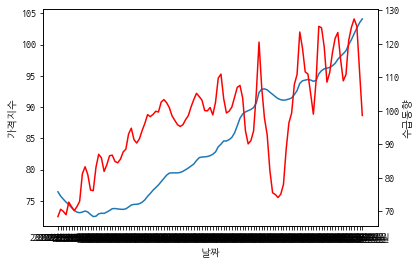

In [ ]:
# 날짜를 기점으로 가격지수와 수급동향을 비교
sns.lineplot( data=add, x='날짜', y='가격지수')
ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot( data=add, x='날짜', y='수급동향', ax=ax2, color='red')


### 상관관계/상관계수과 결과 (가격지수,수급동향)
- +0.3과 +0.7 사이면, 뚜렷한 양적 선형관계를 나타내고있습니다

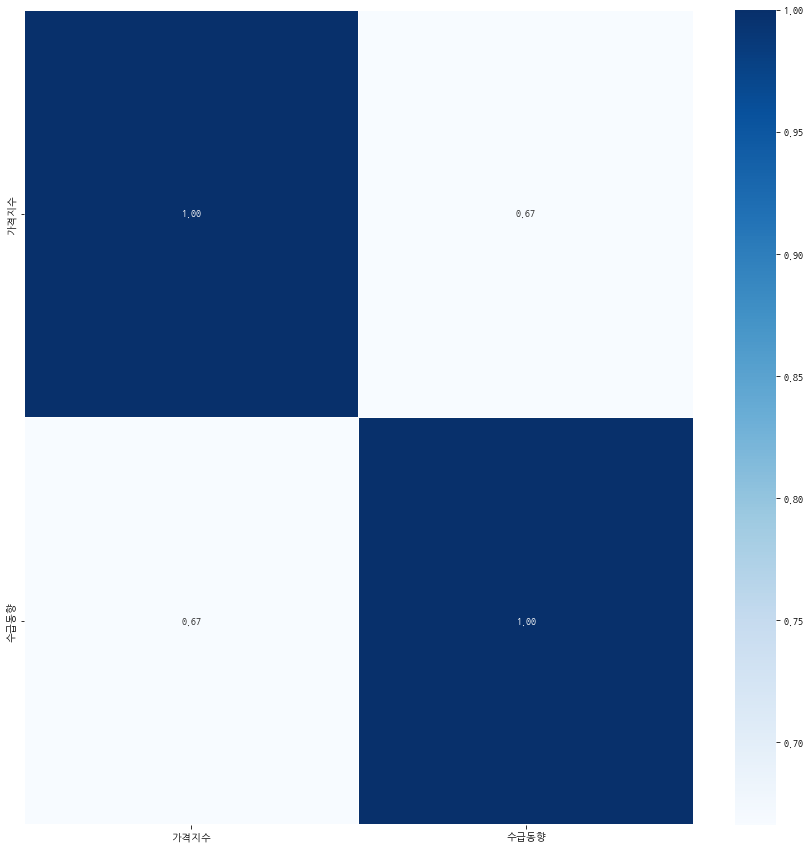

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = add.corr(), annot=True,
fmt = '.2f', linewidths=.5, cmap='Blues')

결론
- 연관성이 있어보인다.
- 아파트를 팔겠다는 사람이 사겠다는 사람보다 많아지면서 매매수급지수 낮아졌다
- 집값이 올라갈수록 파는 사람이 더욱 늘어난다
- 매매수급지수는 부동산원의 회원 중개업소 설문과 인터넷 매물 건수 등을 분석해 수요와 공급 비중을 지수화한 것으로, 기준선인 100 아래로 떨어져 수치가 낮아질수록 매수심리가 약하다는 의미다.

#### 부동산시장소비심리 지수와 아파트월간 매매수급동향과 가격지수
-  가설 = 소비심리가 수급동향과 가격지수에 소비심리로 인한 가격상승과 하락에 분명 연관성이 있다.

# 주택시장 소비심리지수와 월별 주택거래
- 주택거래 변동에 따라 사람들의 주택시장에서의 소비심리를 파악하기 위해서 분석하였습니다.

출처 - https://www.reb.or.kr/r-one/statistics/statisticsViewer.do?menuId=HOUSE_21111

In [ ]:
 data = pd.read_csv('/content/sample_data/Data(심리지수).csv')
data

,Unnamed: 0,시기,주택소비심리
0,0,2019. 01,100.5
1,1,2019. 02,102.1
2,2,2019. 03,100.7
3,3,2019. 04,97.9
4,4,2019. 05,108.5
5,5,2019. 06,128.3
6,6,2019. 07,137.8
7,7,2019. 08,134.1
8,8,2019. 09,138.6
9,9,2019. 10,151.0


In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data

,시기,주택소비심리
0,2019. 01,100.5
1,2019. 02,102.1
2,2019. 03,100.7
3,2019. 04,97.9
4,2019. 05,108.5
5,2019. 06,128.3
6,2019. 07,137.8
7,2019. 08,134.1
8,2019. 09,138.6
9,2019. 10,151.0


In [ ]:
ata = pd.read_csv('/content/sample_data/Data(주택거래).csv')
ata

,Unnamed: 0,주택거래
0,2019년 01월,13452
1,2019년 02월,9027
2,2019년 03월,12206
3,2019년 04월,12897
4,2019년 05월,13581
5,2019년 06월,17434
6,2019년 07월,20486
7,2019년 08월,20565
8,2019년 09월,17419
9,2019년 10월,21670


In [ ]:
ata.drop(columns=['Unnamed: 0'], inplace=True)
ata

,주택거래
0,13452
1,9027
2,12206
3,12897
4,13581
5,17434
6,20486
7,20565
8,17419
9,21670


In [ ]:
join = pd.concat([data,ata], axis=1)
join


,시기,주택소비심리,주택거래
0,2019. 01,100.5,13452
1,2019. 02,102.1,9027
2,2019. 03,100.7,12206
3,2019. 04,97.9,12897
4,2019. 05,108.5,13581
5,2019. 06,128.3,17434
6,2019. 07,137.8,20486
7,2019. 08,134.1,20565
8,2019. 09,138.6,17419
9,2019. 10,151.0,21670


In [ ]:
join

,시기,주택소비심리,주택거래
0,2019. 01,100.5,13452
1,2019. 02,102.1,9027
2,2019. 03,100.7,12206
3,2019. 04,97.9,12897
4,2019. 05,108.5,13581
5,2019. 06,128.3,17434
6,2019. 07,137.8,20486
7,2019. 08,134.1,20565
8,2019. 09,138.6,17419
9,2019. 10,151.0,21670


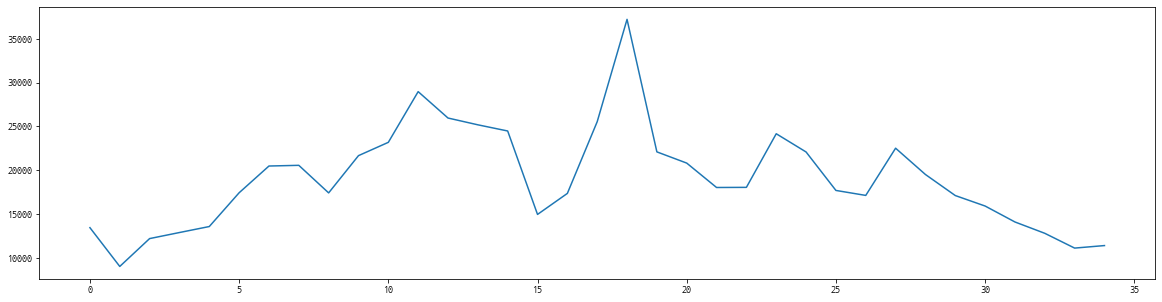

In [ ]:
join['주택거래'].plot(kind='line', figsize=(20,5) )

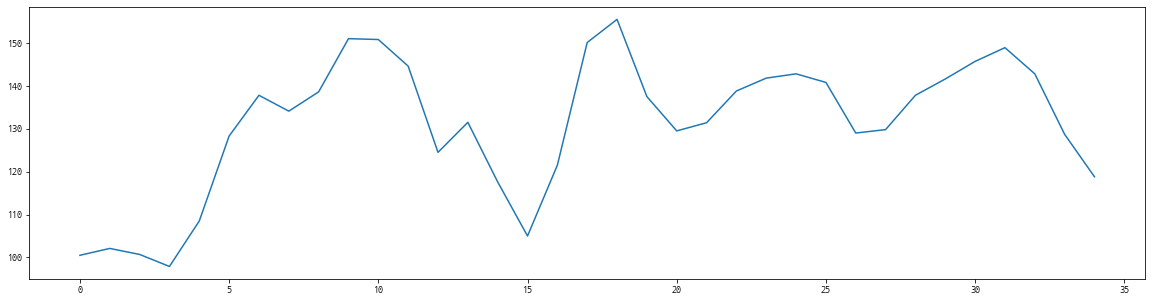

In [ ]:
join['주택소비심리'].plot(kind='line', figsize=(20,5) )

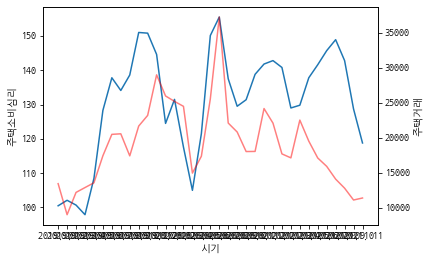

In [ ]:
sns.lineplot( data=data, x='시기', y='주택소비심리')

ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot( data=join, x='시기', y='주택거래', ax=ax2, color='red', alpha=0.5 )

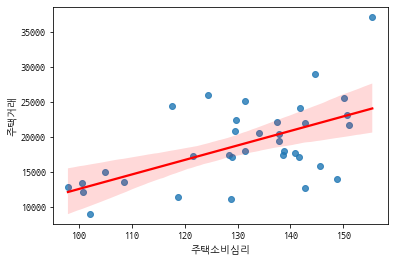

In [ ]:
sns.regplot(data=join, x='주택소비심리', y='주택거래',line_kws={'color':'red'})

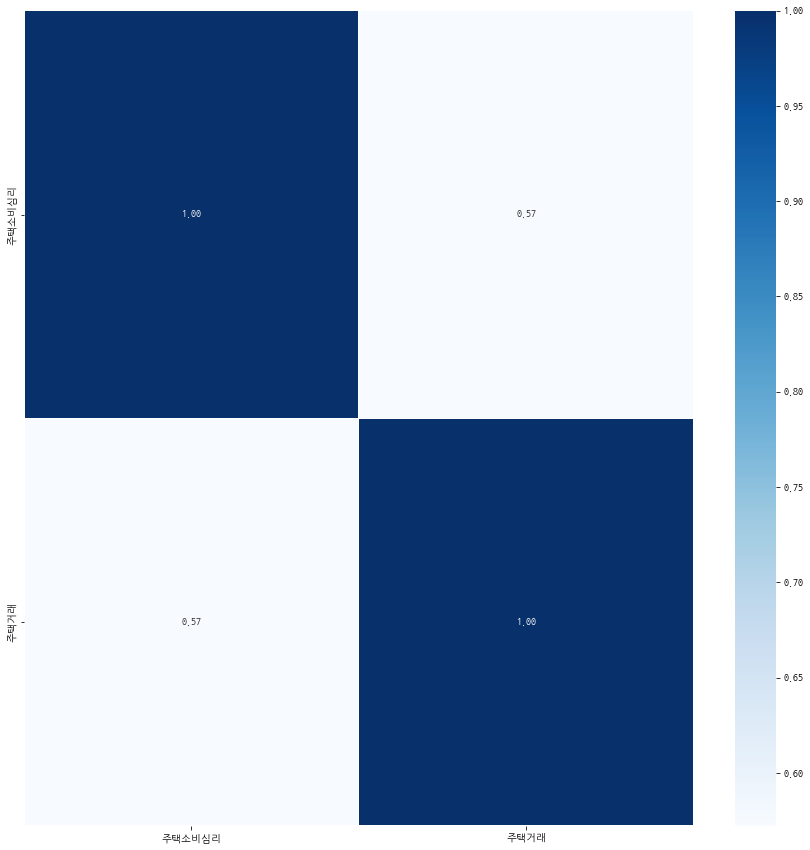

In [ ]:
# 상관관계에 대한 그래프입니다
plt.figure(figsize=(15,15))
sns.heatmap(data = join.corr(), annot=True,
fmt = '.2f', linewidths=.5, cmap='Blues')

#### 결론
- 이게 연관성이 있는건지 없는건지 잘 모르겠다.
- 모르겠다

# 심리지수와 가격지수
- 사람들의 심리지수에 따라 가격지수의 변동을 분석해보았다
- 2019년 1월~2021년 12월

In [ ]:
TT = pd.read_csv('/content/sample_data/가격지수(강북지역).csv')
TT.drop(columns=['Unnamed: 0'], inplace=True)

TT

,시기,강북지역
0,2019년 01월,92.518348
1,2019년 02월,92.298682
2,2019년 03월,92.034959
3,2019년 04월,91.794564
4,2019년 05월,91.647249
5,2019년 06월,91.556150
6,2019년 07월,91.586919
7,2019년 08월,91.710385
8,2019년 09월,91.896329
9,2019년 10월,92.352810


In [ ]:
AA = pd.read_csv('/content/sample_data/가격지수(동남권).csv')
AA.drop(columns=['Unnamed: 0'], inplace=True)
AA[['동남권']]

AA

,시기,동남권
0,2019년 01월,92.299116
1,2019년 02월,91.586219
2,2019년 03월,90.941839
3,2019년 04월,90.499619
4,2019년 05월,90.243626
5,2019년 06월,90.178513
6,2019년 07월,90.289231
7,2019년 08월,90.473549
8,2019년 09월,90.655382
9,2019년 10월,91.473504


In [ ]:
SS = pd.read_csv('/content/sample_data/가격지수(동북권).csv')
SS.drop(columns=['Unnamed: 0'], inplace=True)

SS

,시기,동북권
0,2019년 01월,92.056927
1,2019년 02월,91.849680
2,2019년 03월,91.568251
3,2019년 04월,91.294555
4,2019년 05월,91.134317
5,2019년 06월,91.030491
6,2019년 07월,91.052823
7,2019년 08월,91.161555
8,2019년 09월,91.342314
9,2019년 10월,91.777789


In [ ]:
DD = pd.read_csv('/content/sample_data/가격지수(서남권).csv')
DD.drop(columns=['Unnamed: 0'], inplace=True)
DD[['서남권']]

DD

,시기,서남권
0,2019년 01월,92.287585
1,2019년 02월,92.095420
2,2019년 03월,91.823575
3,2019년 04월,91.507949
4,2019년 05월,91.338107
5,2019년 06월,91.250126
6,2019년 07월,91.328616
7,2019년 08월,91.414966
8,2019년 09월,91.540527
9,2019년 10월,91.987341


In [ ]:
CC= pd.read_csv('/content/sample_data/가격지수(서북권).csv')
CC.drop(columns=['Unnamed: 0'], inplace=True)
CC[['서북권']]

CC

,시기,서북권
0,2019년 01월,93.017632
1,2019년 02월,92.758777
2,2019년 03월,92.541614
3,2019년 04월,92.401252
4,2019년 05월,92.287192
5,2019년 06월,92.237815
6,2019년 07월,92.297244
7,2019년 08월,92.459242
8,2019년 09월,92.655119
9,2019년 10월,93.184612


In [ ]:
QQ= pd.read_csv('/content/sample_data/가격지수(도심권).csv')
QQ.drop(columns=['Unnamed: 0'], inplace=True)
QQ[['도심권']]

QQ

,시기,도심권
0,2019년 01월,94.830609
1,2019년 02월,94.603577
2,2019년 03월,94.372174
3,2019년 04월,94.164393
4,2019년 05월,94.042446
5,2019년 06월,93.956098
6,2019년 07월,93.987668
7,2019년 08월,94.138382
8,2019년 09월,94.341874
9,2019년 10월,94.796239


In [ ]:
data = pd.read_csv('/content/sample_data/Data(심리지수).csv')
data.drop(columns=['Unnamed: 0'], inplace=True)

data

,시기,주택소비심리
0,2019. 01,100.5
1,2019. 02,102.1
2,2019. 03,100.7
3,2019. 04,97.9
4,2019. 05,108.5
5,2019. 06,128.3
6,2019. 07,137.8
7,2019. 08,134.1
8,2019. 09,138.6
9,2019. 10,151.0


In [ ]:
data[['주택소비심리']]
df = data

In [ ]:
gb = TT[['강북지역']]
db = SS[['동북권']]
sn = DD[['서남권']]
dn = AA[['동남권']]
sb = CC[['서북권']]
ds = QQ[['도심권']]

In [ ]:
finish = pd.concat([df,gb], axis=1)
finish1 = pd.concat([finish,ds], axis=1)
finish2 = pd.concat([finish1,db], axis=1)
finish3 = pd.concat([finish2,dn], axis=1)
finish4 = pd.concat([finish3,sb], axis=1)
finish5 = pd.concat([finish4,sn], axis=1)

In [ ]:
finish5

,시기,주택소비심리,강북지역,도심권,동북권,동남권,서북권,서남권
0,2019. 01,100.5,92.518348,94.830609,92.056927,92.299116,93.017632,92.287585
1,2019. 02,102.1,92.298682,94.603577,91.849680,91.586219,92.758777,92.095420
2,2019. 03,100.7,92.034959,94.372174,91.568251,90.941839,92.541614,91.823575
3,2019. 04,97.9,91.794564,94.164393,91.294555,90.499619,92.401252,91.507949
4,2019. 05,108.5,91.647249,94.042446,91.134317,90.243626,92.287192,91.338107
5,2019. 06,128.3,91.556150,93.956098,91.030491,90.178513,92.237815,91.250126
6,2019. 07,137.8,91.586919,93.987668,91.052823,90.289231,92.297244,91.328616
7,2019. 08,134.1,91.710385,94.138382,91.161555,90.473549,92.459242,91.414966
8,2019. 09,138.6,91.896329,94.341874,91.342314,90.655382,92.655119,91.540527
9,2019. 10,151.0,92.352810,94.796239,91.777789,91.473504,93.184612,91.987341


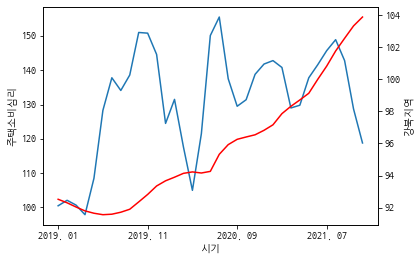

In [ ]:
sns.lineplot( data=finish, x='시기', y='주택소비심리')
ax = plt.gca()

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%10==0:
        xticks[i].set_visible(True)
    else:
       xticks[i].set_visible(False)

ax2 = ax.twinx()


sns.lineplot( data=finish, x='시기', y='강북지역', ax=ax2, color='red')

plt.show()

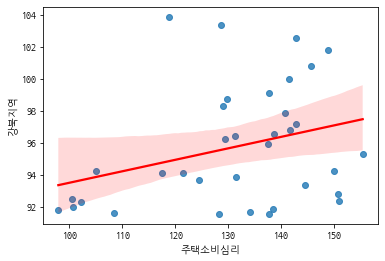

In [ ]:
sns.regplot(data=finish, x='주택소비심리', y='강북지역',line_kws={'color':'red'})

In [ ]:
finish5[['주택소비심리','강북지역','도심권','동북권','동남권','서북권','서남권']].corr()

,주택소비심리,강북지역,도심권,동북권,동남권,서북권,서남권
주택소비심리,1.000000,0.310868,0.298666,0.309489,0.287892,0.319884,0.324286
강북지역,0.310868,1.000000,0.994795,0.999745,0.979603,0.998610,0.996954
도심권,0.298666,0.994795,1.000000,0.992343,0.986227,0.998095,0.995096
동북권,0.309489,0.999745,0.992343,1.000000,0.976895,0.997195,0.995831
동남권,0.287892,0.979603,0.986227,0.976895,1.000000,0.983598,0.979675
서북권,0.319884,0.998610,0.998095,0.997195,0.983598,1.000000,0.997694
서남권,0.324286,0.996954,0.995096,0.995831,0.979675,0.997694,1.000000


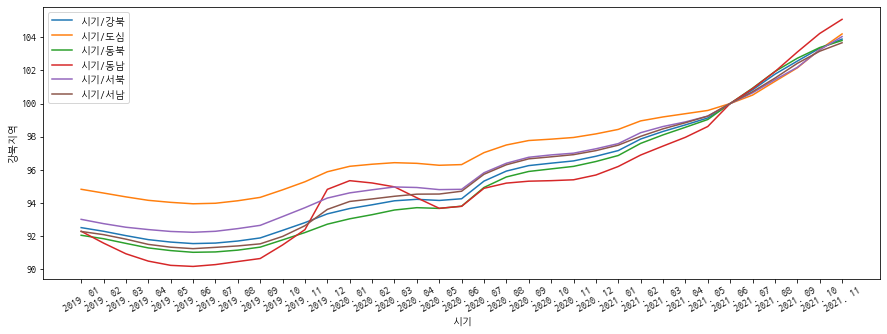

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=finish, x='시기', y='강북지역', label='시기/강북')
sns.lineplot(data=finish1, x='시기', y='도심권', label='시기/도심')
sns.lineplot(data=finish2, x='시기', y='동북권', label='시기/동북')
sns.lineplot(data=finish3, x='시기', y='동남권', label='시기/동남')
sns.lineplot(data=finish4, x='시기', y='서북권', label='시기/서북')
sns.lineplot(data=finish5, x='시기', y='서남권', label='시기/서남')

plt.xticks(rotation=30)
plt.legend()

plt.show()

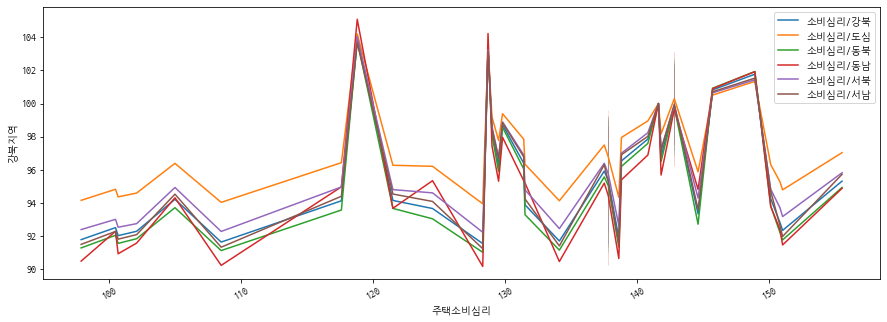

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=finish, x='주택소비심리', y='강북지역', label='소비심리/강북')
sns.lineplot(data=finish1, x='주택소비심리', y='도심권', label='소비심리/도심')
sns.lineplot(data=finish2, x='주택소비심리', y='동북권', label='소비심리/동북')
sns.lineplot(data=finish3, x='주택소비심리', y='동남권', label='소비심리/동남')
sns.lineplot(data=finish4, x='주택소비심리', y='서북권', label='소비심리/서북')
sns.lineplot(data=finish5, x='주택소비심리', y='서남권', label='소비심리/서남')

plt.xticks(rotation=30)
plt.legend()

plt.show()

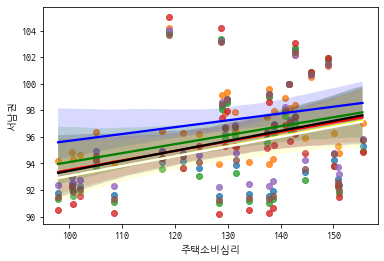

In [ ]:
sns.regplot(data=finish, x='주택소비심리', y='강북지역',line_kws={'color':'red'})
sns.regplot(data=finish1, x='주택소비심리', y='도심권',line_kws={'color':'blue'})
sns.regplot(data=finish2, x='주택소비심리', y='동북권',line_kws={'color':'Yellow'})
sns.regplot(data=finish3, x='주택소비심리', y='동남권',line_kws={'color':'White'})
sns.regplot(data=finish4, x='주택소비심리', y='서북권',line_kws={'color':'Green'})
sns.regplot(data=finish5, x='주택소비심리', y='서남권',line_kws={'color':'Black'})

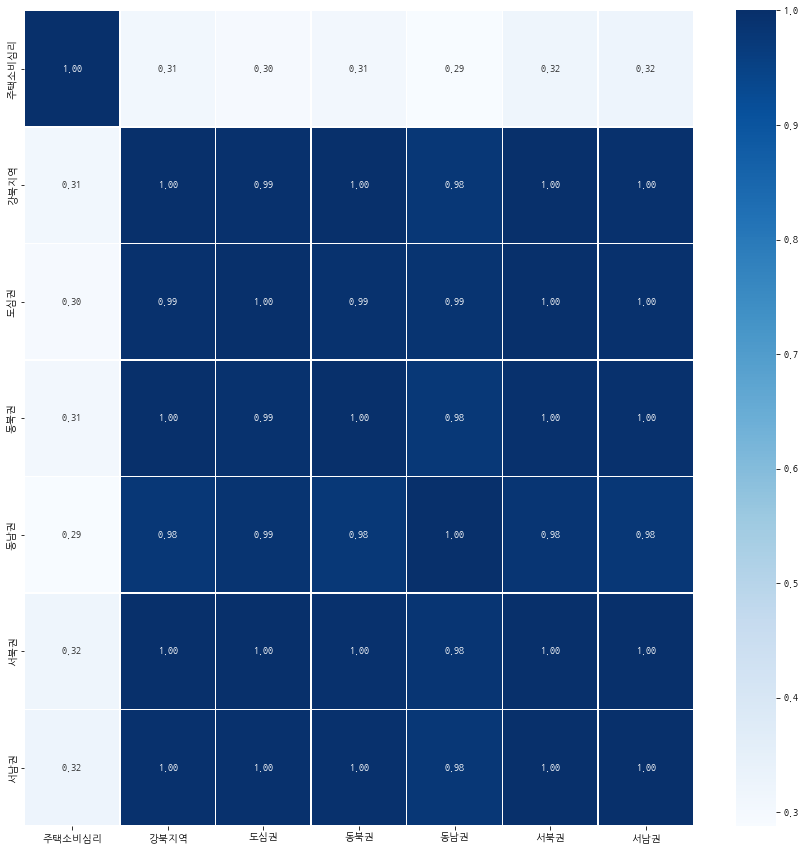

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = finish5.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

결론 - 모르곘다
